In [53]:
import pyaudio
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time
from tkinter import TclError
import sounddevice as sd
import pandas as pd

fs = 48000

duration = 3  # seconds
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=1)

sd.default.samplerate = fs
sd.default.channels = 1

myrecording = sd.rec(int(duration * fs))


sd.wait()

print(myrecording)

[[ 0.0000000e+00]
 [ 0.0000000e+00]
 [-3.0517578e-05]
 ...
 [ 2.7465820e-03]
 [ 2.0446777e-03]
 [-2.1362305e-04]]


In [54]:
sd.play(myrecording, samplerate=None, mapping=None, blocking=False, loop=False)

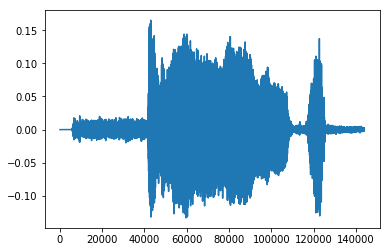

In [59]:
plt.plot(myrecording)

In [60]:
X = np.fft.fft(myrecording, axis=0)
X

array([[-4.780486  +0.j       ],
       [ 2.9082732 +2.079677j ],
       [ 0.29934126-1.3116539j],
       ...,
       [-1.4209988 +1.2832787j],
       [ 0.29934126+1.3116539j],
       [ 2.9082732 -2.079677j ]], dtype=complex64)

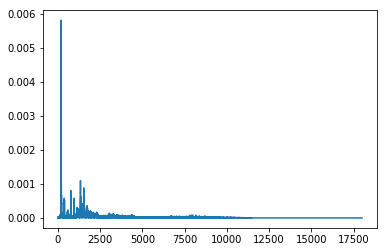

In [61]:
X = np.abs(X)

fmax = 18000
nmax = int(len(X) * fmax / fs)

X = X[:nmax]
X = X / sum(X)
f = np.linspace(0, fmax, nmax)
plt.plot(f, X)


,0
count,54000.000000
mean,0.846022
std,0.236539
min,0.000028
25%,0.811545
50%,0.964667
75%,0.999940
max,1.000054


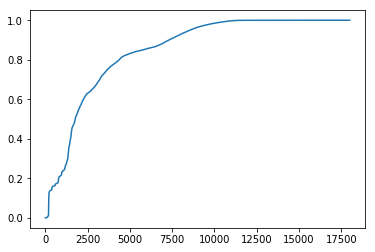

In [67]:
cX = np.cumsum(X)
plt.plot(f, cX)
df = pd.DataFrame(cX)
df.describe()
df